In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Cargamos el dataset
df= pd.read_csv("/content/hola - hoja 1.csv")
# Descripción genereal del conjunto de datos
df.describe()

FileNotFoundError: ignored

In [ ]:

df.head()

,G,Nombre Estudiante,GENERO,Dirección,Perdidas,Edad
0,2,GUZMAN BAUTISTA MARIA ISABELLA,M,CL 185 A BIS 8 58,0,9
1,2,BAUTISTA UNRIZA VALERIA,M,DUAG 77 B 116 B 42,1,8
2,2,ALVAREZ CEPEDA SANTIAGO,H,DIAG 1 6 65,0,8
3,2,ALBARRACIN MORA CAMILO,H,CALLE 65 B BIS SUR # 77 K 33,1,9
4,2,BOTIA PATIÑO JUAN JERONIMO,H,CALLE 43 18 21 APTO 101,0,7


In [ ]:
# Cambiamos la variable categórica Sex por la variable numérica Sex_male (Donde male = 1, fremale = 0)
df = pd.get_dummies(df, columns=['GENERO'], drop_first=True)
df.head()

,G,Nombre Estudiante,Dirección,Perdidas,Edad,GENERO_M
0,2,GUZMAN BAUTISTA MARIA ISABELLA,CL 185 A BIS 8 58,0,9,1
1,2,BAUTISTA UNRIZA VALERIA,DUAG 77 B 116 B 42,1,8,1
2,2,ALVAREZ CEPEDA SANTIAGO,DIAG 1 6 65,0,8,0
3,2,ALBARRACIN MORA CAMILO,CALLE 65 B BIS SUR # 77 K 33,1,9,0
4,2,BOTIA PATIÑO JUAN JERONIMO,CALLE 43 18 21 APTO 101,0,7,0


In [ ]:
# Seleccionamos las características para el modelo
data = df[['GENERO_M', 'Perdidas', 'Edad', 'G']]
data.head()

,GENERO_M,Perdidas,Edad,G
0,1,0,9,2
1,1,1,8,2
2,0,0,8,2
3,0,1,9,2
4,0,0,7,2


In [ ]:
# Información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   GENERO_M  189 non-null    uint8
 1   Perdidas  189 non-null    int64
 2   Edad      189 non-null    int64
 3   G         189 non-null    int64
dtypes: int64(3), uint8(1)
memory usage: 4.7 KB


In [ ]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
# X son nuestras variables independientes
X = data.drop(["Perdidas"],axis = 1)

# y es nuestra variable dependiente
y = data.Perdidas

# División 75% de datos para entrenamiento, 25% de daatos para test
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [ ]:
# Creaamos el modelo de Bosques Aleatorios (y configuramos el número de estimadores (árboles de decisión))
BA_model = RandomForestClassifier(n_estimators = 50, 
                                  random_state = 50,
                                  min_samples_leaf = 18,)

In [ ]:
BA_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=18, n_estimators=50, random_state=50)

In [ ]:
# Accuracy promedio
BA_model.score(X_test, y_test)

0.7083333333333334

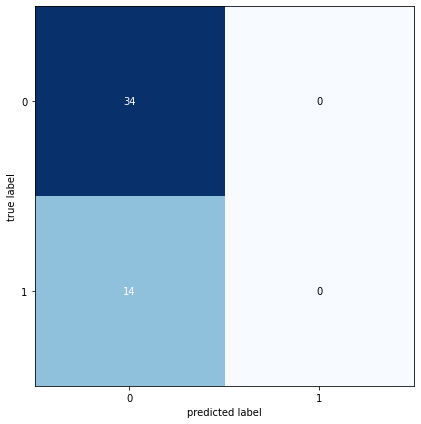

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Predicción del modelo usando los datos de prueba
y_pred = BA_model.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()